In [2]:
import gzip
import os

import argparse
import datetime
import requests
import time
import  urllib,json
from requests_oauthlib import OAuth1

In [3]:
answer = 'yesware'
cnt = 50
print(answer)
dt=str(datetime.date.today()).replace('-','')
ts = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d_%H%M%S')
print(ts)
directory='tweets'
if not os.path.exists(directory+'/'+str(answer)):
    os.makedirs(directory+'/'+str(answer))
    if not os.path.exists(directory+'/'+str(answer)+'/'+dt):
        os.makedirs(directory+'/'+str(answer)+'/'+str(dt))
else:
    if not os.path.exists(directory+'/'+str(answer)+'/'+dt):
        os.makedirs(directory+'/'+str(answer)+'/'+str(dt))

yesware
20180515_172743


In [4]:
url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
oauth = OAuth1('agSoBzGNJ0CIgM22ejyyYNHVA', 'KvQHO1k62Si4384scHddoEJFDTraSP9XZzbgZudLnOr0bpWyOn',
    '2326494187-2fQmHdhfUEP7DuBMnFMcakQJi4aoHSHLSzRbXZk', 'pH523gAixrlOn9LlvU39cPwrPcI3TlJydpb8S0gHc5GC7')
rq=requests.get(url, auth=oauth)
#print(rq)

r=requests.get('https://api.twitter.com/1.1/search/tweets.json?q='+str(answer)+'&count='+str(cnt),auth=oauth)
data=r.json()
tweets=[]
tweet_dict={}

if(data.get("statuses",'none')!='none'):
    tweets=data.get("statuses",'none')
    #print(tweets)

for i in range(0,len(tweets)):
    tweet_dict=tweets[i]
    userid=str(tweet_dict['user']['id'])
    createdat=tweet_dict['created_at']
    #cr=time.strftime("%Y%m%d_%H%M%S",tweet_dict['user']['created_at'])
    '''createdat.replace(' ',"")
    createdat.replace('+',"")
    cr=createdat.replace('0000',"")'''
    cr=createdat.replace('+0000 ',"")
    tm=time.strptime(cr)
    #print(time.struct_time(tm_year))
    print(str(tm[5]))

    with open('Processed_tweets/'+str(answer)+'_'+str(userid)+'_'+str(tm[0])+str('{0:02d}'.format(tm[1]))+str('{0:02d}'.format(tm[2]))+'_'+str('{0:02d}'.format(tm[3]))+str('{0:02d}'.format(tm[4]))+str('{0:02d}'.format(tm[5]))+'.json', 'w') as outfile:
        json.dump(tweets[i], outfile)
    #print(time.strftime("%Y%m%d_%H%M%S",time.localtime(cr)))

with open(directory+'/'+str(answer)+'/'+str(dt)+'/'+str(answer)+'_'+str(ts)+'.json', 'w') as outfile:
    json.dump(r.json(), outfile)


46
52
5
30
10
49
28
45
41
41
11
16
40
46
23
16
15
19
54
2
44
1
14
55
51
10
52
22
1
7
55
57
57
11
47
13
19
22
29
15
56
3
59
12


In [5]:
import os
import json
import time
count=0
loc="Processed_tweets"
row=[]
row.append('searchterm,userid,created_year,created_month,created_date,created_hour,created_min,created_sec,retweet_count,favorite_count,friends_count,followers_count,tweet\n')
for filename in os.listdir(loc):
    if filename.endswith(".json"):
        searchterm=filename[:filename.find('_')]
        remterm=filename[filename.find('_')+1:]
        userid=remterm[:remterm.find('_')]

    
        with open(loc+'/'+filename) as data_file:
            data = json.load(data_file)
            createdat=data['created_at']
            cr=createdat.replace('+0000 ',"")
            tm=time.strptime(cr)
            row.append(searchterm+','+userid+','+str(tm[0])+','+str('{0:02d}'.format(tm[1]))+','+str('{0:02d}'.format(tm[2]))+','+str('{0:02d}'.format(tm[3]))+','+str('{0:02d}'.format(tm[4]))+','+str('{0:02d}'.format(tm[2]))+','+str(data['retweet_count'])+','+str(data['favorite_count'])+','+str(data['user']['friends_count'])+','+str(data['user']['followers_count'])+','+str(data['text']).replace(',','').replace('\n','')+'\n')

with open('processed.csv','w') as f:
    for s in row:
        f.write(s)

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df=pd.read_csv("processed.csv")
df2=df[['tweet']]
df2

,tweet
0,@vcbuzz A5 @yesware is another great tool. It’s built to increase your sales but it works nicely for blogger outrea… https://t.co/U7d9cVLlNc
1,Just spent 20 minutes on the phone with @sheenadesa talking about yesware client engagement and streamlining reporting. For fun.
2,Do you have killer #accountmanagement skills? Love to work with clients on strategy that will drive major #revenue?… https://t.co/IZnfPPtJTE
3,RT @VentureFizz: Check out May's hottest #BostonTech jobs in the latest #CareerForward ft @GoCatalant @SmartBear @Carbonite @yesware @Cray…
4,@yesware Please clarify - have you been deleting data from user accounts in advance of GDPR without notifying subscribers?
5,How To Find Email Addresses: 13 Free Tools Tips And Tactics https://t.co/kLoGXmqupY via @Yesware
6,How To Write A Pitch That Actually Converts Prospects - https://t.co/VGv4fBHG6R via @Yesware
7,18 Gmail Extension Time-Savers To Supercharge Your Inbox - https://t.co/yd9PwftmQ3 via @Yesware
8,RT @Akita: Our head of sales lists his favorite budget prospecting tools - https://t.co/Uzk9Q2R3sn including @linkedin @salesforce and his…
9,Mobile Email Research: How People Use Email at Work - https://t.co/GkVfTWrhrX via @Yesware @aaronmetosky


In [7]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [8]:
pos_count = 0
neg_count = 0
df=pd.read_csv("processed.csv")
df["positivity"]=0.000
df["negativity"]=0.000
#print(df)
for i in range(0,len(df)):
    blob = TextBlob(df["tweet"][i], analyzer=NaiveBayesAnalyzer())
    df["positivity"][i]=blob.sentiment.p_pos*100
    df["negativity"][i]=blob.sentiment.p_neg*100
    print(blob.sentiment)
    if blob.sentiment.classification == 'pos':
        pos_count+=blob.sentiment.p_pos
    if blob.sentiment.classification == 'neg':
        neg_count+=blob.sentiment.p_neg
pos_count=float(pos_count/len(df))
neg_count=float(neg_count/len(df))

print("Overall positivity score:"+str(pos_count))
print("Overall negativity score:"+str(neg_count))
#print(df["Type"][i])

/home/kishore/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kishore/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Sentiment(classification='pos', p_pos=0.9873081028762324, p_neg=0.012691897123767377)
Sentiment(classification='pos', p_pos=0.604606446946995, p_neg=0.3953935530530071)
Sentiment(classification='pos', p_pos=0.9197106796271829, p_neg=0.08028932037281634)
Sentiment(classification='neg', p_pos=0.20764617798976312, p_neg=0.7923538220102362)
Sentiment(classification='pos', p_pos=0.8520193427611527, p_neg=0.14798065723884324)
Sentiment(classification='pos', p_pos=0.9967253539293731, p_neg=0.003274646070625108)
Sentiment(classification='neg', p_pos=0.07976133653989662, p_neg=0.9202386634601031)
Sentiment(classification='pos', p_pos=0.8238600803806393, p_neg=0.17613991961936096)
Sentiment(classification='pos', p_pos=0.9232090796670199, p_neg=0.07679092033298086)
Sentiment(classification='pos', p_pos=0.9820064871616526, p_neg=0.017993512838347867)
Sentiment(classification='pos', p_pos=0.9926184601790519, p_neg=0.007381539820946855)
Sentiment(classification='neg', p_pos=0.49422467168331113, p_ne

In [9]:
pos_count/len(df)

0.014242600997326764

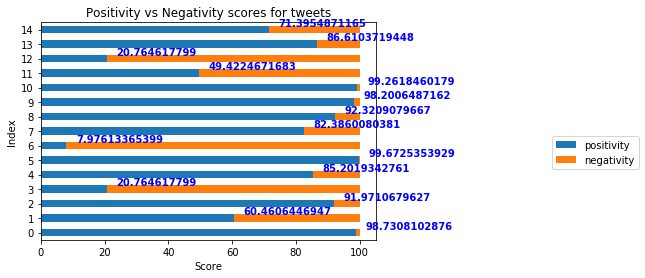

In [12]:
df2=df[['positivity','negativity']].head(15)
ax=df2.plot(kind='barh', stacked=True,title = "Positivity vs Negativity scores for tweets",legend=False)
ax.legend(bbox_to_anchor=(1.8, 0.5))
ax.set_xlabel("Score")
ax.set_ylabel("Index")
for i, v in enumerate(df2['positivity']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')